In [1]:
import pandas as pd 
import numpy as np
import collections
import matplotlib.pyplot as plt

## Data analysis
We have explore four various aspects of the data:
- The data distribution of spam/ham emails
- Top 10 words and all unique words that occur in the input data 
- The average length of sentences from spam/ham emails
- Detect all punctuation that occur

_The reason why we use 2 different approaches to read the csv file is that we find out there are only 5728 records while it is announced that there are 5730 records. We would like to see wether it is caused by pandas package or not._ The problem is 2 of sentences from the csv file are so long that in csv file it is splitted into 2 rows automatically. It happens in rows 1382 and 2654.

In [2]:
import csv

file = open('./data/Spam_Emails.csv')
csvreader = csv.reader(file)
header = []
header = next(csvreader)
print(header)
rows = []
stat = []
for row in csvreader:
    rows.append(row)
    stat.append(csvreader.line_num)
len(rows)

['text', 'spam']


5728

In [3]:
""" 
Read data in .csv format

Input:
filename: the given path to the file

Output:
X, y: sentences, class(0/1)
"""

def readData(filename):
    df = pd.read_csv(filename)
    X = []
    y = []
    print(len(df))
    for i in range(len(df)):
        sentence = df.iloc[i, 0]
        
        # The actual sentences
        _class = df.iloc[i, 1]

        X.append(sentence)
        y.append(_class)
    return X, y

In [4]:
X, y = readData("./data/Spam_Emails.csv")

5728


In [5]:
print(len(X))
print(len(y))
print(X[:5])

5728
5728
["Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability

In [6]:
y = np.array(y)

In [7]:
# Count each class individually 
counter = collections.Counter(y)
print(counter)

Counter({0: 4360, 1: 1368})


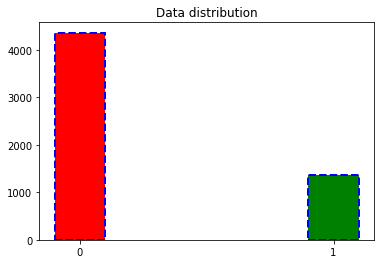

In [8]:
class_list = np.array([0, 1])
counter = np.array([4360, 1368])


plt.bar(range(len(counter)), counter, color=['r', 'g', 'b'], width=0.2, tick_label=class_list,  ec='b', ls='--', lw=2)
plt.title("Data distribution")
plt.show()

In [9]:
import copy

'''
Flatten the input array
'''
def flatten_input(X):
    X_copy = copy.copy(X)
    concatenate_string = ""
    for i in range(len(X_copy)):
        concatenate_string += X_copy[i]
    return concatenate_string, X_copy

concatenate_string, X_copy = flatten_input(X)

In [10]:
import string 

'''
Detect all punctuation that occur in the input data
'''
def detect_punctuations(concatenate_string):
    result = string.punctuation 
    punctuation = []
    for i in concatenate_string:

        # checking whether the char is punctuation.
        if i in string.punctuation:
            if i not in punctuation:
                punctuation.append(i)
                # Printing the punctuation values 
                print("Punctuation: " + i)
    return punctuation
                
punctuation = detect_punctuations(concatenate_string)

Punctuation: :
Punctuation: ;
Punctuation: ,
Punctuation: .
Punctuation: -
Punctuation: '
Punctuation: %
Punctuation: _
Punctuation: $
Punctuation: !
Punctuation: (
Punctuation: )
Punctuation: @
Punctuation: &
Punctuation: /
Punctuation: ?
Punctuation: |
Punctuation: *
Punctuation: "
Punctuation: +
Punctuation: =
Punctuation: >
Punctuation: #
Punctuation: [
Punctuation: ]
Punctuation: ^
Punctuation: }
Punctuation: <
Punctuation: ~
Punctuation: \
Punctuation: `
Punctuation: {


In [11]:
print(len(punctuation))
print(punctuation)

32
[':', ';', ',', '.', '-', "'", '%', '_', '$', '!', '(', ')', '@', '&', '/', '?', '|', '*', '"', '+', '=', '>', '#', '[', ']', '^', '}', '<', '~', '\\', '`', '{']


In [12]:
'''
Remove all punctuations
'''
def remove_punctuations(concatenate_string):
    new_words = []
    for word in concatenate_string.split():
        for letter in word:
            if letter in string.punctuation:
                word = word.replace(letter,"")   
        new_words.append(word)
    return new_words

new_words = remove_punctuations(concatenate_string)

In [13]:
'''
Count top 10 words that occur in the input data and unique words
'''
counter = collections.Counter(new_words)
print(counter.most_common(10))

[('', 475161), ('the', 50110), ('to', 41734), ('and', 27478), ('of', 23757), ('a', 19943), ('you', 19149), ('in', 17972), ('i', 17421), ('for', 16696)]


In [14]:
def calculate_sentence_length(X_copy):
    first_class_length = []
    second_class_length = []
    for i in range(4360):
        first_class_length.append(len(X_copy[i]))
    for i in X_copy[4360:]:
        second_class_length.append(len(i))
    return first_class_length, second_class_length

first_class_length, second_class_length = calculate_sentence_length(X_copy)

In [15]:
data = [-1, -1]
data[0] = round(sum(first_class_length)/len(first_class_length), 2)
data[1] = round(sum(second_class_length)/len(second_class_length),2)

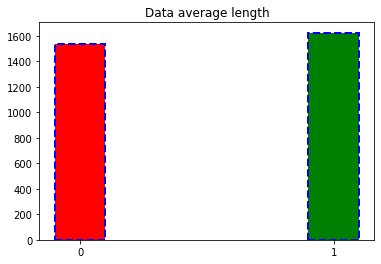

In [16]:
class_list = np.array([0, 1])

plt.bar(range(len(data)), data, color=['r', 'g', 'b'], width=0.2, tick_label=class_list,  ec='b', ls='--', lw=2)
plt.title("Data average length")
plt.show()